<a href="https://colab.research.google.com/github/pratikwatwani/Applied-Data-Science/blob/master/Session%2008%20and%20Session%2009/PCA%2C%20Logistic%20Regression%20and%20Time%20Series%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1. Visualization of Hand-Written Digits

As one of the examples sklearn provides a dataset of handwritten digits. This data includes impages of 1787 digits. For each digit, we have 64 variables x1,x2,...x64, each one representing a pixel (grayscale from 0 to 16) on the 8x8 image. The label (y) for each image is the actual digit it represents from 0 to 9.  

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from scipy.stats import t
from sklearn import preprocessing
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from numpy.random import seed
from numpy.random import randn
import scipy
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the data
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data # the digits data
y = digits.target # the labels for the digits. This label is only used for coloring the points.
#Make a dataframe 
data=pd.DataFrame(np.concatenate((y.reshape(len(y),1),X),axis=1))
data.columns=["y"]+["x{}".format(i) for i in range(1,65)]
data.head()

,y,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64
0,0.0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,2.0,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,3.0,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,4.0,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [3]:
#original image data is a 2D array
X.shape

(1797, 64)

In [0]:
#split data into training, validation and test samples
X1=X[:1000,:]; y1=y[:1000]
X2=X[1000:-300,:]; y2=y[1000:-300]
X3=X[-300:,:]; y3=y[-300:]

#### If we take the first 10 observations and reconstruct the graph and we could see:  

Label:[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


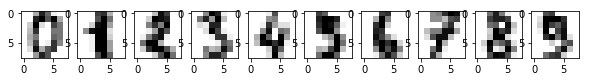

In [5]:
#plot the digits using imshow from matplotlib
plt.figure(figsize=(10,1))
print("Label:{}".format(list(y[:10])))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[i].reshape(8,8), cmap=plt.cm.gray_r)
plt.show()

In [6]:
print("{},{},{}".format(X1.shape[0],X2.shape[0],X3.shape[0]))

1000,497,300


Now apply PCA to see if we can describe the data with a smaller number of most significant features

### Q1. Use PCA to transform the first 1000 digit images (X1). How many leading principal components are needed to cover a)50%, b)80% of the information from the original dataset?
Make sure to standardize the data beofe applying PCA

In [0]:
#X is the original data set with 1797 rows, and 64 features
#X1 is the training set with 1000 rows
#X2 is the validation set with 497 rows
#X3 is the testing set with 300 rows 

In [0]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [0]:
u,s,v = np.linalg.svd(X1)

In [0]:
var_dict = {}
for k in range(0, 64):
  var_dict[k] = (s[k]/s.sum())*100

In [11]:
df = pd.DataFrame.from_dict(var_dict, orient = 'index', columns = ['Variance Retained'])
df.index.name = 'Principal Component'
df.head()

,Variance Retained
Principal Component,
0,5.378238
1,4.818316
2,4.458901
3,4.123033
4,3.550910


In [0]:
covar_matrix = PCA(n_components = 64)
covar_matrix.fit_transform(X1)
variance = covar_matrix.explained_variance_ratio_ 
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=2)*100)

In [13]:
var

array([12., 22., 30., 37., 42., 46., 50., 53., 56., 59., 62., 64., 66.,
       68., 70., 72., 74., 76., 78., 80., 81., 82., 83., 84., 85., 86.,
       87., 88., 89., 90., 91., 92., 93., 94., 95., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.,
       96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96., 96.])

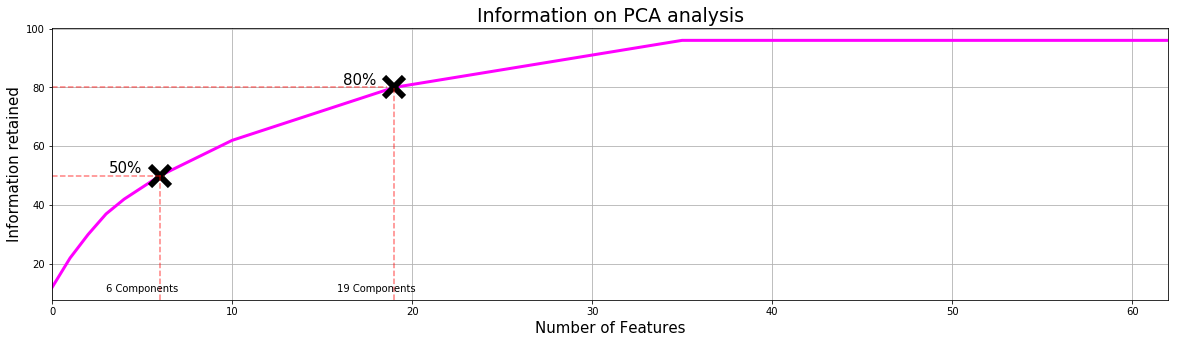

In [14]:
fig, ax = plt.subplots(figsize = (20,5))
ax.grid()
#ax.set_yticks(ticks = np.arange(0,200,10))
ax.set_xlim(xmin=0, xmax = 62)
plt.plot(var, linewidth = 3, color = 'magenta')
plt.plot(np.where(var ==50)[0][0], 50, marker='x', mew = 6,markersize=20, color="k")
plt.plot(np.where(var ==80)[0][0], 80, marker='x', mew = 6, markersize=20, color='k')

plt.text(np.where(var == 50)[0][0]-1, 50+5,'50%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 15)
plt.text(np.where(var == 80)[0][0]-1, 80+5,'80%', verticalalignment = 'top', horizontalalignment = 'right', fontsize = 15)


plt.text(np.where(var == 50)[0][0]-1, 50-40,str(np.where(var == 50)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 10)
plt.text(np.where(var == 80)[0][0]-1, 80-70,str(np.where(var == 80)[0][0])+' Components', verticalalignment = 'bottom', horizontalalignment = 'center', fontsize = 10)



ax.axvline(np.where(var == 50)[0][0],color ='red', linestyle ='--', ymin = 0, ymax = 0.46, alpha = 0.5)
ax.axvline(np.where(var == 80)[0][0],color ='red', linestyle ='--', ymin = 0, ymax = 0.78, alpha = 0.5)

ax.axhline(y=50, color = 'red', linestyle = '--', xmin = 0, xmax = 0.1, alpha = 0.5)
ax.axhline(y=80, color = 'red', linestyle = '--', xmin = 0, xmax = 0.3, alpha = 0.5)

plt.xlabel('Number of Features', fontsize = 15)
plt.ylabel('Information retained', fontsize = 15)
plt.title('Information on PCA analysis', fontsize =19)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

### Q2. Visualize digits 3, 6, 7 (y=3,6,7) using the first two principal components of X1  

In [0]:
pca_train = PCA(X1.shape[1])
X1 = pca_train.fit_transform(X1)

In [0]:
X2 = scaler.transform(X2)
X3 = scaler.transform(X3)

X2 = pca_train.transform(X2)
X3 = pca_train.transform(X3)

In [0]:
X1_copy = X1.copy()
X2_copy = X2.copy()
X3_copy = X3.copy()

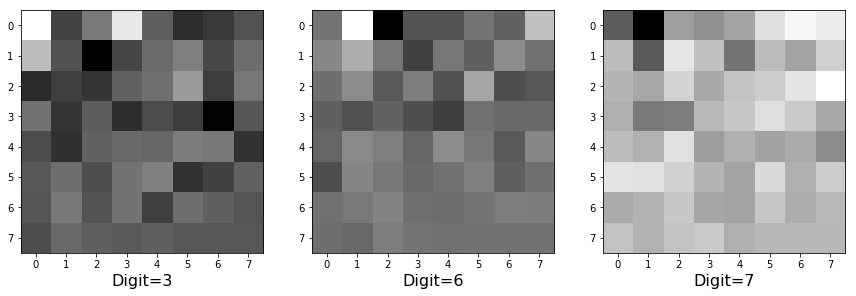

In [18]:
digits = [3,6,7]
count = 1

plt.figure(figsize=(20,15))

for digit in digits:
  plt.subplot(1,4, count)
  plt.xlabel('Digit=%i' %digit, fontsize =16)
  plt.imshow(X1[digit][:].reshape(8,8), cmap=plt.cm.gray_r)
  count+=1

plt.show()

In [19]:
temp_y = y1.copy()
temp_y = pd.DataFrame(temp_y)
temp_y.columns = ['Labels']

tp = pd.DataFrame(X1)
tp = tp.merge(temp_y, on = tp.index)
tp.drop('key_0', axis = 1, inplace = True)
tp.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,Labels
0,1.462621,-1.481760,-4.425389,1.440417,0.007824,0.649491,-0.607300,1.320935,0.312769,-0.935029,-1.606039,-0.426827,0.146051,-0.059674,-0.076691,0.124832,0.397888,0.225177,0.651774,-0.261708,0.460698,-0.297874,0.156813,-0.702090,0.135084,-0.918619,-0.395283,0.022341,-0.274694,-0.085900,0.883113,0.074831,0.197003,-0.156985,0.463789,-0.105376,0.608007,0.102573,0.486562,0.224760,0.406068,-0.092116,-0.158869,-0.284971,0.298139,-0.087117,-0.196777,0.183548,-0.348442,-0.157381,-0.451699,0.139014,-0.308440,-0.175983,-0.003409,0.246271,-0.434251,0.031675,-0.102806,-0.062538,-0.080752,-0.000000e+00,0.000000e+00,6.124685e-15,0
1,0.657289,0.588974,4.141148,-0.925951,-1.091260,-0.722809,1.234368,-0.019765,0.840140,-0.966422,1.219414,0.206339,0.234494,-0.052982,0.144577,-0.049195,0.083447,-0.012699,0.212858,-0.541850,-0.223992,-0.458697,0.409530,1.660651,-0.663689,1.023845,1.345243,-0.688930,-0.525926,-0.604329,0.685116,1.094659,0.609796,-0.640081,0.192677,-0.686881,-0.052886,0.007073,0.093480,0.288437,0.029621,-0.025959,0.465819,0.172998,1.111960,0.726697,-0.334721,0.039544,0.211111,-0.116396,-0.163679,-0.479411,0.092937,-0.198569,0.203673,0.391653,0.513634,0.067937,0.145519,-0.097069,0.053741,9.047608e-16,1.713640e-16,4.165349e-17,1


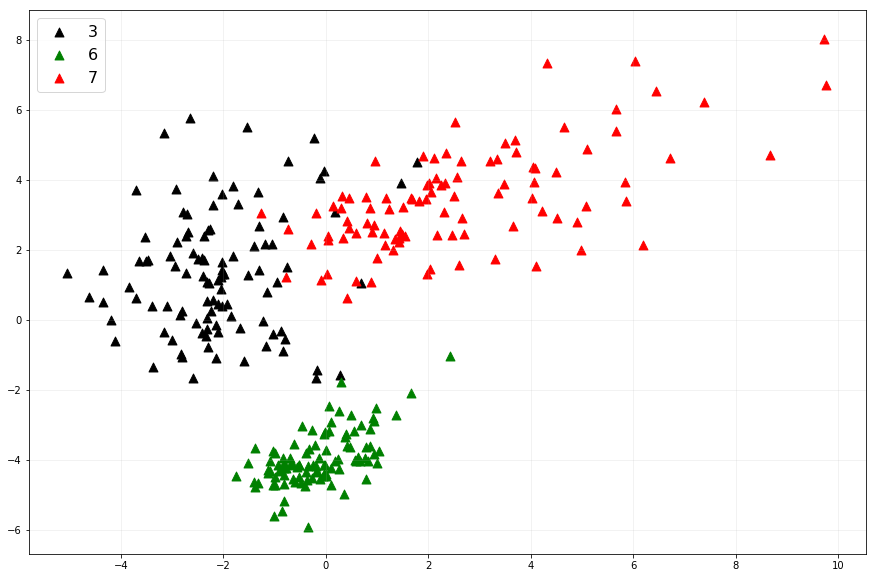

In [20]:
label = tp.Labels == 3
x = tp[label]
x.iloc[:,:2]
digits = {3 : 'k',6: 'green',7: 'red'}

fig, ax = plt.subplots(figsize = (15,10))
plt.grid(alpha = 0.2)

for digit,color in digits.items():
  label = tp.Labels == digit
  x = tp[label]
  plt.scatter(x.iloc[:,:1],x.iloc[:,1:2], marker = '^', c = color, s = 80)
  plt.legend(digits.keys(),fontsize = 16)

In [21]:
'''
digits = {3 : 'k',6: 'green',7: 'red'}
fig, ax = plt.subplots(figsize = (15,10))
plt.grid(alpha = 0.2)
for digit,color in digits.items():
  ymin, ymax = ax.get_ylim()
  xmin, xmax = ax.get_xlim()

  plt.plot(digit, X1[digit,1], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, label = 'Digit %d' %digit, markeredgecolor = color)
  plt.plot(digit, X1[digit,2], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, markeredgecolor = color)
  plt.plot(digit, X1[digit,1], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)
  plt.plot(digit, X1[digit,2], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)

  plt.xlabel('Digit', fontsize = 16)
  plt.ylabel('Values', fontsize = 16)
  #plt.axhline(y=X1[digit,3], color = 'k', linestyle = ':')
  #plt.text(digit+0.15,X1[digit,1]+0.1,'%f' %X1[digit,1], horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = 10)
  #plt.text(xmin+0.001,X1[digit,3]-0.05,'Value: %f' %X1[digit,3],fontsize = 10)
  
plt.legend(loc = 'best', markerscale = 0.2, fontsize = 15, labelspacing = 1)
plt.show()
'''

"\ndigits = {3 : 'k',6: 'green',7: 'red'}\nfig, ax = plt.subplots(figsize = (15,10))\nplt.grid(alpha = 0.2)\nfor digit,color in digits.items():\n  ymin, ymax = ax.get_ylim()\n  xmin, xmax = ax.get_xlim()\n\n  plt.plot(digit, X1[digit,1], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, label = 'Digit %d' %digit, markeredgecolor = color)\n  plt.plot(digit, X1[digit,2], marker = 'o', markersize = 30, mew=5, c = color, alpha = 0.6, markeredgecolor = color)\n  plt.plot(digit, X1[digit,1], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)\n  plt.plot(digit, X1[digit,2], marker = 'x', markersize = 5, mew=2, c = 'w', alpha = 0.6)\n\n  plt.xlabel('Digit', fontsize = 16)\n  plt.ylabel('Values', fontsize = 16)\n  #plt.axhline(y=X1[digit,3], color = 'k', linestyle = ':')\n  #plt.text(digit+0.15,X1[digit,1]+0.1,'%f' %X1[digit,1], horizontalalignment = 'right', verticalalignment = 'bottom', fontsize = 10)\n  #plt.text(xmin+0.001,X1[digit,3]-0.05,'Value: %f' %X1[digit,3],fontsi

## Task 2. Classify the digits using leading principal components

### Q1. Train multi-class logistic regression over the first 1000 digits using first 5 leading principal components
Report in-sample and out-of-sample (over X3, the last 300 digits) accuracy. 

You will need to apply the same scaler and PCA transform trained above to X3

Here and further use regularization constant C=10000 in logistic regression to avoid regularization

In [22]:
print("X(Original) number of records: {},\nX1(Training) number of records: {},\nX2(Validation) number of records: {},\nX3(Test) number of records: {}".format(X.shape[0],X1.shape[0],X2.shape[0],X3.shape[0]))

X(Original) number of records: 1797,
X1(Training) number of records: 1000,
X2(Validation) number of records: 497,
X3(Test) number of records: 300


In [23]:
#Logistic Regression with C = 10000
regc = LogisticRegression(C= 10000)
regc.fit(X1[:,:5],y1)

print("In Sample Accuracy: {}".format(1.0*(regc.predict(X1[:,:5])==y1).sum()/len(regc.predict(X1[:,:5]))))

print("Out of Sample Accuracy: {}".format(1.0*(regc.predict(X3[:,:5])==y3).sum()/len(regc.predict(X3[:,:5]))))

In Sample Accuracy: 0.836
Out of Sample Accuracy: 0.713333333333


### Q2. Select the optimal number of principal components for the classification above in terms of the out-of-sample accuracy measured over the validation sample X2. Report the performance of the classification after this feature selection over the test sample X3 of the last 300 digits.


In [0]:
optimal_dict = {}
reg_new = LogisticRegression(C = 10000)
for component in range(1,65):

  reg_new.fit(X1_copy[:,:component],y1)
  optimal_dict[component+1] = 1.0*(reg_new.predict(X2_copy[:,:component])==y2).sum()/len(reg_new.predict(X2_copy[:,:component]))
  #print("Out sample accuracy for Component K: {} is --- {}".format(component+1, 1.0*(reg_new.predict(X2_copy[:,:component+1])==y2).sum()/len(reg_new.predict(X2_copy[:,:component+1]))))

optimal_df = pd.DataFrame.from_dict(optimal_dict, orient = 'index', columns = ['Accuracy'])
optimal_df.index.name = 'Principal Component'
optimal_df.sort_values(by = 'Accuracy', ascending = False, inplace = True)

In [75]:
optimal_df.head()

,Accuracy
Principal Component,
53,0.931590
52,0.925553
56,0.925553
55,0.925553
45,0.921529


In [73]:
mask = optimal_df.iloc[0]
print(mask)
index_value = optimal_df.Accuracy[optimal_df.Accuracy == optimal_df.Accuracy.iloc[0]].index.to_list()[0]

Accuracy    0.93159
Name: 53, dtype: float64


In [74]:
reg_new_test = LogisticRegression(C = 10000)
reg_new_test.fit(X1[:,:index_value],y1)
print("Out of Sample Accuracy: {}".format(1.0*(reg_new_test.predict(X3[:,:index_value])==y3).sum()/len(reg_new_test.predict(X3[:,:index_value]))))

Out of Sample Accuracy: 0.863333333333


## Task3. Time Series Analysis
**Dataset Description**
- Portland Oregon riders monthly data: It is a monthly count of riders for the Portland public transportation system. The website states that it is from January 1960 through June 1969

**Tasks**:
- Detect a trend
- Decompose into trend + seasonality + residuals
- Analyze residual distribution
- Select the top 3-5 outliers based on absolute values of residuals 

In [0]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/pratikwatwani/Applied-Data-Science/master/data/portland-oregon-average-monthly-.csv")

In [0]:
# change column name to make it easier for your life
df.columns = ["month", "avgMonthlyRide"]

In [0]:
# remove artifact data
df = df.drop(df.index[df['avgMonthlyRide'] == ' n=114'])

In [31]:
# type transfer: int32 for `avgMonthlyRide`, datetime for `month`
df['avgMonthlyRide'] = df['avgMonthlyRide'].astype(np.int32)
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')
df.head()

,month,avgMonthlyRide
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [0]:
df.set_index('month', inplace = True, drop = True)

In [33]:
# get the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
avgMonthlyRide    114 non-null int32
dtypes: int32(1)
memory usage: 1.3 KB


In [34]:
# get the describe of the dataset
df.describe()

,avgMonthlyRide
count,114.000000
mean,1120.543860
std,270.888317
min,613.000000
25%,885.000000
50%,1158.000000
75%,1340.000000
max,1558.000000


In [0]:
#df['ym'] = pd.to_datetime(df['month'], format="%Y-%m").dt.to_period('M')
#df.head()

### Q1. Visualize the time-series of monthly ridership

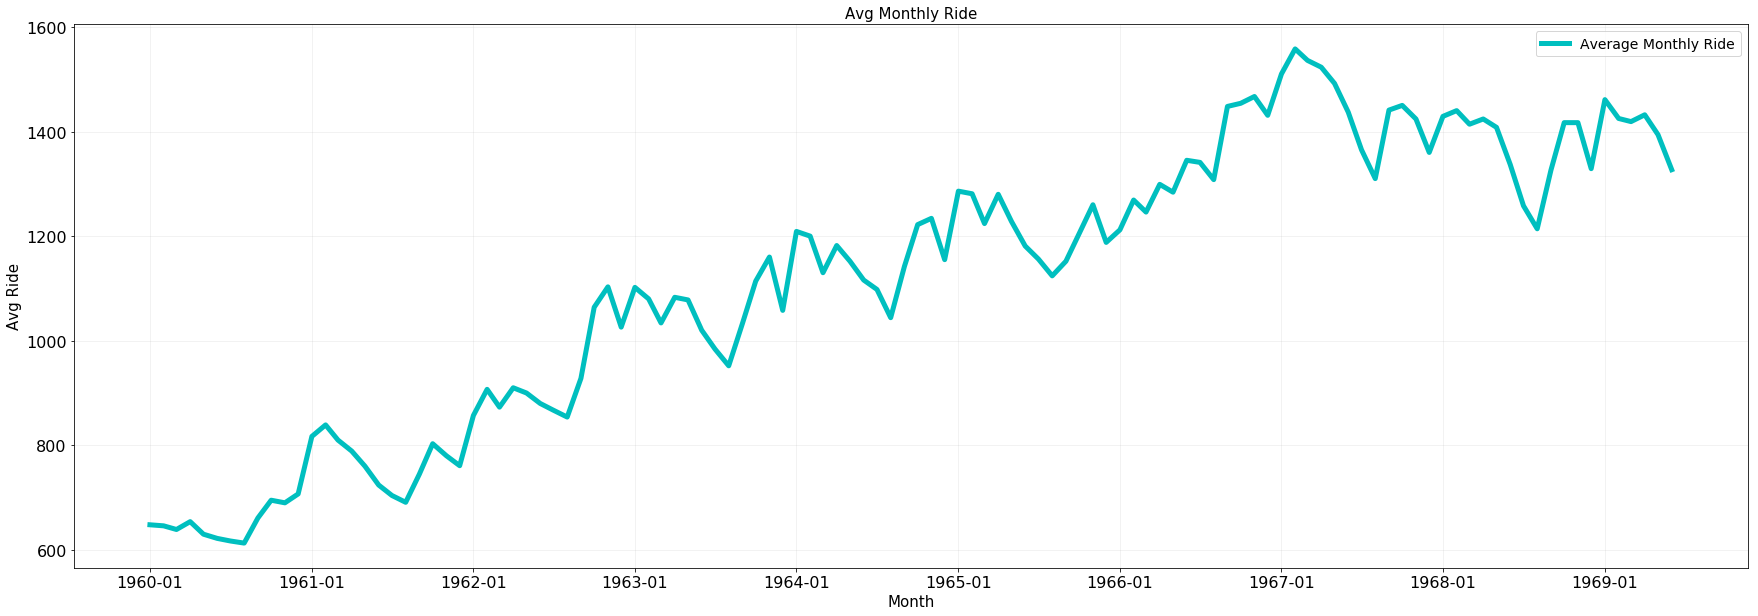

In [36]:
fig, ax = plt.subplots(figsize = (30,10))
plt.plot(df.index,df.avgMonthlyRide, color='c',linewidth=5)
ax.xaxis.set_major_formatter(DateFormatter("19%y-%m"))
plt.legend(['Average Monthly Ride'], fontsize = 14)
plt.tick_params(labelsize=16)
ax.grid(b=True, alpha = 0.2)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Avg Ride', fontsize = 15)
plt.title('Avg Monthly Ride', fontsize = 15)
plt.show()
plt.close()

### Q2. Visualize the 12-month moving average to assess the trend

In [0]:
#df.drop('ym', axis = 1, inplace = True)

In [0]:
#df.set_index('month', drop=True, inplace = True)

<Figure size 720x720 with 0 Axes>

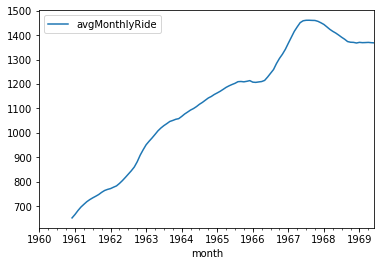

In [39]:
fig= plt.figure(figsize = (10,10))
df.rolling(window = 12).mean().plot()

### Q3. Perform seasonal decomposition using 12 month period

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 114 entries, 1960-01-01 to 1969-06-01
Data columns (total 1 columns):
avgMonthlyRide    114 non-null int32
dtypes: int32(1)
memory usage: 1.3 KB


<Figure size 1440x720 with 0 Axes>

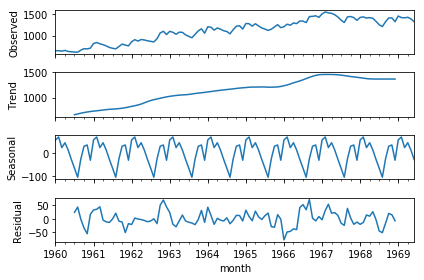

In [41]:
plt.figure(figsize = (20,10))
result = sm.tsa.seasonal_decompose(df)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
observed = result.observed
result.plot()
plt.show()

### Q4. Visualize the distribution of residues and visually compare it with normal distribution with the same mean and standard deviation

The value of sigma is :27.5172766325


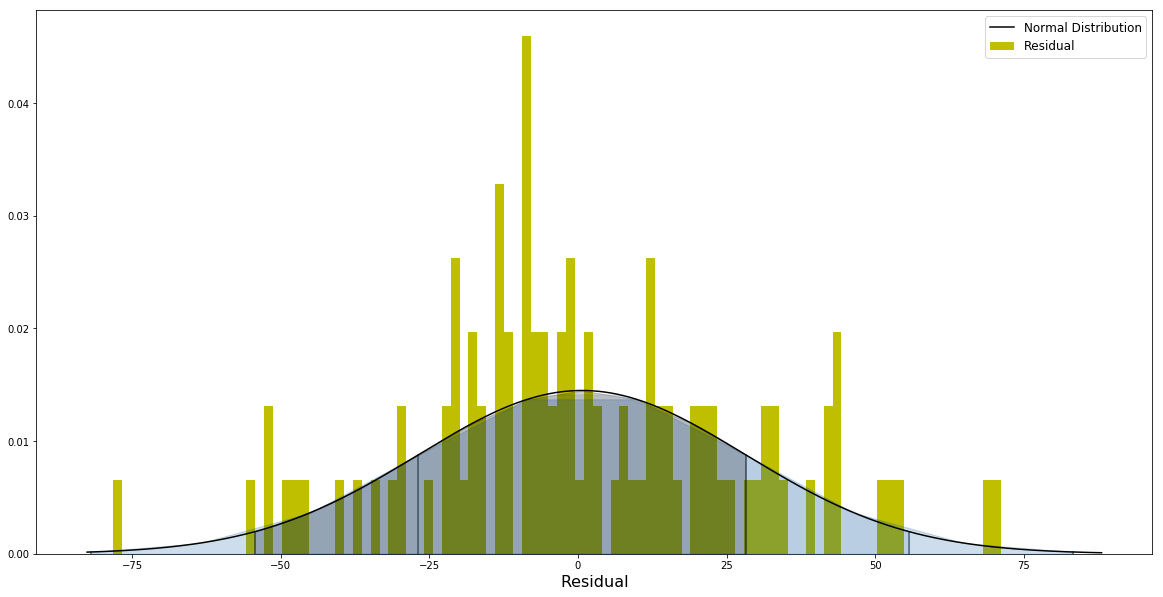

In [42]:
seed(271996)
plt.figure(figsize=(20,10))
residual = np.array(sm.tsa.seasonal_decompose(df, model='additive').resid)
residual = residual[np.logical_not(np.isnan(residual))]

plt.hist(residual,bins=100, density=True, color = 'y', label = 'Residual',zorder = 1)
sigma=residual.std()
mean = residual.mean()
print('The value of sigma is :{}'.format(sigma)) 

x=np.linspace(-3*sigma,3.2*sigma,5000)
plt.plot(x,scipy.stats.norm.pdf(x,loc=residual.mean(),scale=sigma), color = 'k', label = 'Normal Distribution', zorder = 10)
#plt.axvline(residual.mean(), linestyle = ':', linewidth = 3, ymin = 0, ymax =float(max(scipy.stats.norm.pdf(x,mean,sigma))))
plt.xlabel('Residual', fontsize = 16)
plt.legend(fontsize = 12)


pt11 =mean+ sigma
pt21 =mean-sigma
pt12 =mean+2*sigma
pt22 =mean-2*sigma  
pt13 =mean+3*sigma
pt23 =mean-3*sigma

plt.plot([pt11,pt11],[0.0,scipy.stats.norm.pdf(pt11 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt12,pt12],[0.0,scipy.stats.norm.pdf(pt12 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt13,pt13],[0.0,scipy.stats.norm.pdf(pt13 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt21,pt21],[0.0,scipy.stats.norm.pdf(pt21 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt22,pt22],[0.0,scipy.stats.norm.pdf(pt22 ,mean, sigma)], color='black', alpha = 0.6)
plt.plot([pt23,pt23],[0.0,scipy.stats.norm.pdf(pt23 ,mean, sigma)], color='black', alpha = 0.6)


ptx1 = np.linspace(pt11, pt22, 10)
pty1 = scipy.stats.norm.pdf(ptx1,mean,sigma)
plt.fill_between(ptx1, pty1, color='k', alpha = 0.2, zorder = 20)

ptx2 = np.linspace(pt12, pt22, 10)
pty2 = scipy.stats.norm.pdf(ptx2,mean,sigma)
plt.fill_between(ptx2, pty2, color='#0b559f', alpha= 0.1 , zorder = 10)

ptx3 = np.linspace(pt13, pt23, 10)
pty3 = scipy.stats.norm.pdf(ptx3,mean,sigma)
plt.fill_between(ptx3, pty3, color='#0b559f', alpha='0.2', zorder = 10)


plt.fill()
plt.show()

### Q5. Find the strongest lower/upper outliers (months with the smallest and largest residues)

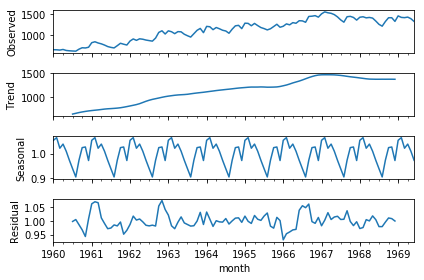

In [43]:
data = df['avgMonthlyRide']
monthly = sm.tsa.seasonal_decompose(data, model='mult', freq = 12)
monthly.plot();

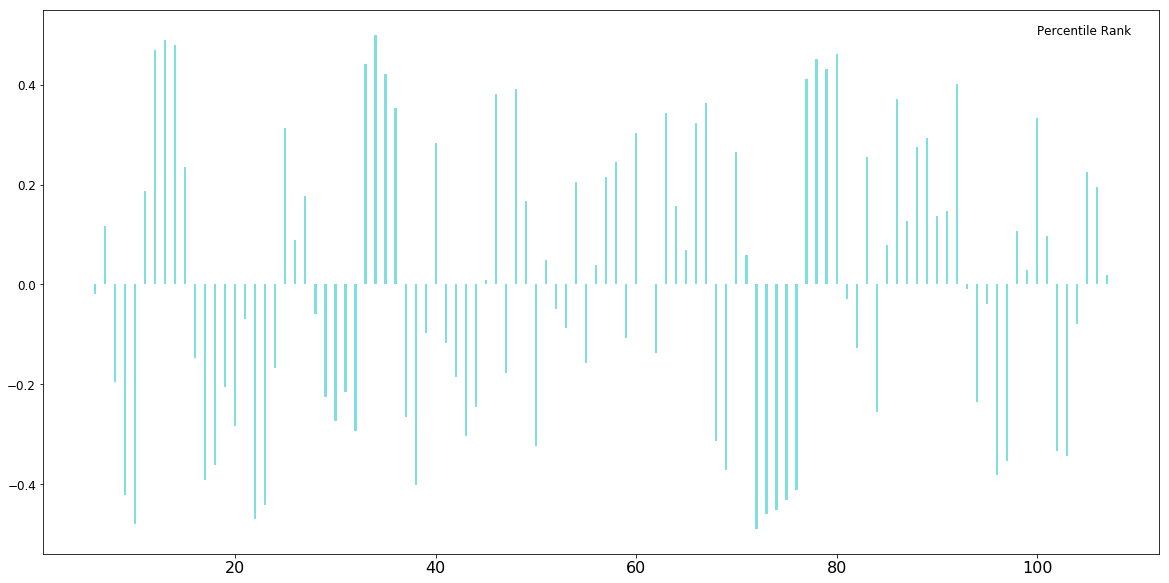

In [44]:
outlier = pd.DataFrame()
outlier['Res'] = monthly.resid
outlier['Percentile_rank'] = outlier.Res.rank(pct = True)-0.5
plt.figure(figsize = (20,10))
plt.bar(np.arange(0, len(outlier)), outlier['Percentile_rank'], color = 'c', label = 'Percentile Rank', width = 0.22, alpha = 0.5)
#plt.bar(np.arange(0, 58), outlier.ix[:58,'Percentile_rank'], color = 'y', label = 'Percentile Rank', width = 0.22, alpha = 0.5)
#plt.bar(np.arange(58, len(outlier)), outlier.ix[58:,'Percentile_rank'], color = 'm', width = 0.22, alpha = 0.5)
plt.yticks(fontsize =12)
plt.xticks(fontsize =16)
plt.text(100,0.5,'Percentile Rank', fontsize = 12)
plt.show()

In [45]:
outlier.head()

,Res,Percentile_rank
month,,
1960-01-01,NaN,NaN
1960-02-01,NaN,NaN
1960-03-01,NaN,NaN
1960-04-01,NaN,NaN
1960-05-01,NaN,NaN


In [46]:
outlier.dropna(axis = 0, how ='all', inplace = True)
outlier.head()

,Res,Percentile_rank
month,,
1960-07-01,0.997459,-0.019608
1960-08-01,1.004407,0.117647
1960-09-01,0.985716,-0.196078
1960-10-01,0.967008,-0.421569
1960-11-01,0.942772,-0.480392


In [47]:
a= pd.DataFrame(outlier.Percentile_rank.sort_values(ascending = True))
a.tail()

,Percentile_rank
month,
1966-09-01,0.460784
1961-01-01,0.470588
1961-03-01,0.480392
1961-02-01,0.490196
1962-11-01,0.500000


In [48]:
print("Month with lowest residual value {}".format(str(a.index[0])[:7]))
print("Month with highest residual value {}".format(str(a.index[-1])[:7]))

Month with lowest residual value 1966-01
Month with highest residual value 1962-11
